# Google Play and Apple iOS App Recommendations

### Scenario:

We're data analysts for an app development company in the United States. Over the last five years we have established a respectably sized customer based, but there are still opportunities to grow our customer base and increase revenue. We want to develop a new app that is a stand-alone free version that our customers will enjoy. To generate revenue, we may employ in-app purchases or a subscription-based model. 

For reference the six most used app monetization strategies (for free apps) are:

* App advertising
* In-app purchases
* Subscriptions
* Selling merchandise
* Sponsorships
* Collecting and selling data
   
To minimize risks and overhead, our validation strategy for an app idea has three steps:

* Build a minimal Android version of the app, and add it to Google Play.
* If the app has a good response from users, we develop it further.
* If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Since we want to develop a new app for Google Play and iOS, the app profiles we pick need to be successful for both markets.

## Method
Before we do any visualization or making and recommendations, we first need to do the following:
* Load in the datasets
* Clean data
* Exploratory Data Analysis

## Recommendations
To make sound business decisions we need to perform a few tasks during analysis:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.style as style
#pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [2]:
csv = pd.read_csv("google_apps_cleaned.csv")
csv.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
0,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,Webserveis,2020-05-21,2021-05-06,Everyone,True,False,False,False
1,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,Climate Smart Tech2,2018-09-10,2018-10-13,Everyone,True,False,False,False
2,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,USD,android developer779,2019-09-23,2019-09-27,Everyone,True,False,False,False
3,The Everyday Calendar,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,USD,Mozaix LLC,2019-06-21,2019-06-21,Everyone,False,False,False,False
4,Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,USD,Free 2021 Themes for Emoji keyboard,2019-09-22,2020-10-07,Everyone,True,False,False,False


### Column information
The cleaned dataset does not contain missing data, and I removed several irrelevant columns that would not help our analysis.
A complete look at the data cleaning process can be found within the attached notebook file: `google_play_eda.ipynb`.

The original dataset contained over 2 million rows of data, which is about how many apps exist on the google play store currently. I removed any observations that included apps named in foreign languages, especially non-latin characters. To implement this task we can use the python method `.isascii()` in conjunction with a lambda function to iterate over all rows in a certain column. 

For further reading on the American Standard Code for Information Interchange: *https://en.wikipedia.org/wiki/ASCII*

As mentioned in the introduction, the fictional app developer is a US based company, and we only develop applications for English-speaking users. Attempting to analyzing non-English language apps is not in our interest, therefore we'll remove any instances of such apps.

I filtered out any observations with 0 user installations (the number of times the app had been downloaded and installed) and 0 reviews. If the app had not been downloaded nor reviewed, it is not worth having unused applications that may skew the analysis. 

After data cleaning had ben performed the original dataset had been reduced to only 40% of its original size, but I would consider 929,254 observations to be more than enough for a representative dataset.

In [3]:
csv.info(memory_usage = "deep")
print("\n")

# Current dataset length (in percentage) after data cleaning
print("Remaining dataset length:", round(csv.shape[0] / 2312944 * 100, 2),"%") # 2,312,944 rows was the original length 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929254 entries, 0 to 929253
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          929254 non-null  object 
 1   Category          929254 non-null  object 
 2   Rating            929254 non-null  float64
 3   Rating Count      929254 non-null  float64
 4   Installs          929254 non-null  object 
 5   Minimum Installs  929254 non-null  float64
 6   Maximum Installs  929254 non-null  int64  
 7   Free              929254 non-null  bool   
 8   Price             929254 non-null  float64
 9   Currency          929254 non-null  object 
 10  Developer Id      929254 non-null  object 
 11  Released          929254 non-null  object 
 12  Last Updated      929254 non-null  object 
 13  Content Rating    929254 non-null  object 
 14  Ad Supported      929254 non-null  bool   
 15  In App Purchases  929254 non-null  bool   
 16  Editors Choice    92

### Overview

In [4]:
# Frequency of app categories
category_frequency = round(csv["Category"].value_counts(normalize = True) * 100, 2)

# Convert value counts series to pandas dataframe
category_frequency = pd.Series.to_frame(category_frequency).reset_index()

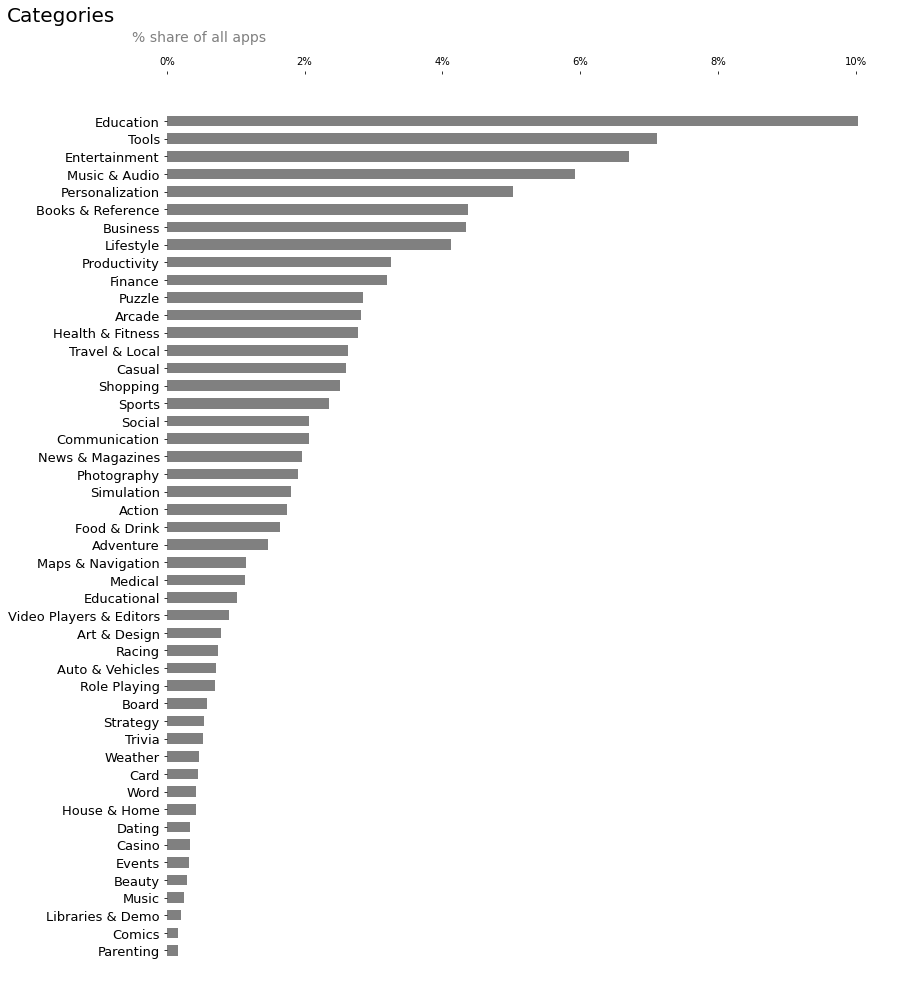

In [5]:
category_frequency = category_frequency.rename(columns = {"index": "App_Category", "Category":"Percentage"})
#4B86C1

fig, ax = plt.subplots(figsize = (13, 17))
plt.barh(category_frequency["App_Category"], category_frequency["Percentage"], color = "grey", height = 0.6)
plt.gca().invert_yaxis()
plt.title("Categories", size = 20, loc = "left", x = -0.22, y = 1.05)
plt.text(-.5, -4.5,"% share of all apps", size = 14, color = "grey")

plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
#plt.xticks(size = 13, color = "grey")
plt.yticks(size = 13)
# Convert x ticks to percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

In [16]:
# Category rating average
categories_grouped = csv.groupby("Category")
print("The average app rating is:", round(csv["Rating"].mean(), 2), "out of 5")
print("\n")
print(round(categories_grouped["Rating"].mean().sort_values(ascending = False), 2))

The average app rating is: 4.1 out of 5


Category
Events                     4.29
Arcade                     4.26
Music & Audio              4.25
Personalization            4.25
Word                       4.24
Books & Reference          4.24
Puzzle                     4.24
Shopping                   4.22
Education                  4.22
Social                     4.19
Food & Drink               4.15
News & Magazines           4.15
Casino                     4.14
Educational                4.13
Casual                     4.12
Trivia                     4.12
Weather                    4.11
Lifestyle                  4.11
Communication              4.08
Board                      4.08
Libraries & Demo           4.07
Adventure                  4.07
Business                   4.07
Medical                    4.07
Sports                     4.06
Travel & Local             4.04
Card                       4.03
Beauty                     4.03
Productivity               4.02
Finance              

In [20]:
def dif(group):
    return (group.max() - group.mean())

In [23]:
category_group = csv.groupby("Category")
category_group["Rating"].agg(dif).sort_values(ascending=False)


Category
Video Players & Editors    1.198383
Simulation                 1.196099
House & Home               1.194331
Dating                     1.174706
Photography                1.123787
Music                      1.111427
Tools                      1.094597
Auto & Vehicles            1.086970
Maps & Navigation          1.079236
Comics                     1.076035
Art & Design               1.022394
Parenting                  1.021196
Role Playing               1.017777
Racing                     1.010325
Strategy                   1.009566
Entertainment              0.998108
Action                     0.994631
Health & Fitness           0.981036
Finance                    0.980829
Productivity               0.976671
Beauty                     0.971449
Card                       0.968920
Travel & Local             0.957522
Sports                     0.943677
Medical                    0.931038
Business                   0.930609
Adventure                  0.929905
Libraries & Demo   

In [45]:
category_pivot_table = csv.pivot_table(index = "Category", aggfunc = {"Category" : "count", "Rating" : "mean"})
category_pivot_table = category_pivot_table.rename(columns={"Category":"Total_Count", "Rating":"Average_Rating"})
category_pivot_table = category_pivot_table.sort_values(by = "Average_Rating", ascending = False)

In [48]:
category_pivot_table

,Total_Count,Average_Rating
Category,,
Events,2973,4.292096
Arcade,26204,4.256835
Music & Audio,54970,4.254542
Personalization,46761,4.253217
Word,4003,4.244067
Books & Reference,40725,4.237137
Puzzle,26462,4.236554
Shopping,23412,4.221105
Education,93193,4.216739


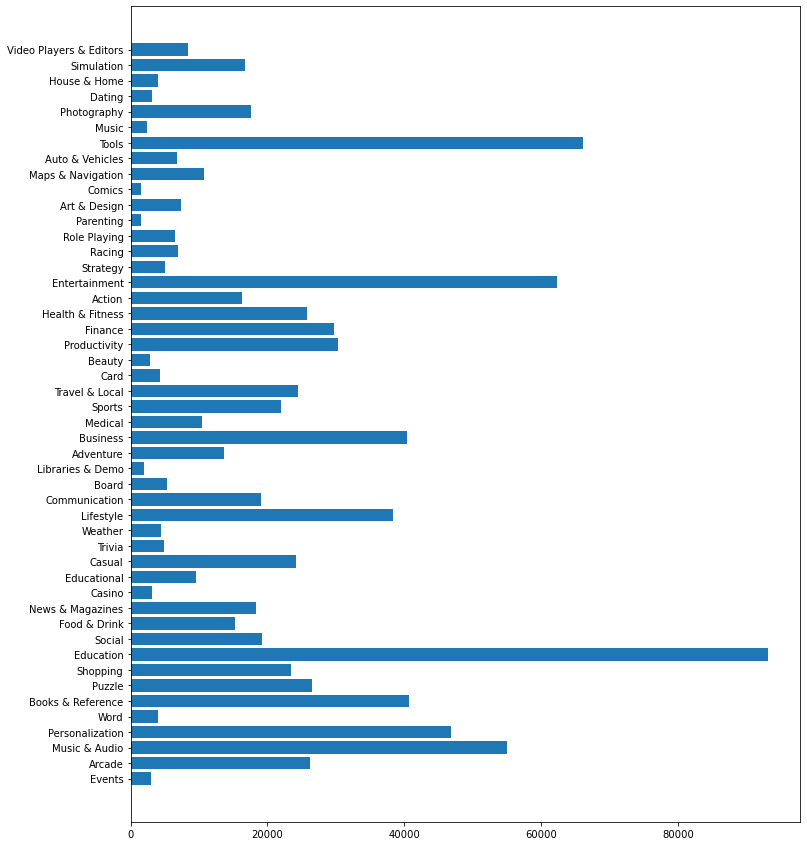

In [74]:
plt.figure(figsize=(12, 15))

plt.barh(category_pivot_table.index, category_pivot_table["Total_Count"])
plt.show()

### Data Exploration

We have dealt with missing data, but this dataset has roughly 1000 rows that are duplicate entries of the same app. In addition, we noticed apps with non-English character usage and text characters that are not in Standard American Code (ASCII)

*https://en.wikipedia.org/wiki/ASCII*

As mentioned in our introduction, we are a US based company, and we only develop applications for English-speaking users. Attempting to analyzing non-English language apps is not in our interest, therefore we'll remove any instances of such apps.

We know that our datasets contain duplicates and foreign-language characters when we previewed the data on kaggle.com.

The google play dataset has more occurrences of duplicated apps, whereas the apple store dataset has less than 10.
